# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Checking the number of mice.
mice= combine_data["Mouse ID"].value_counts()
mice_number = len(mice)
mice_number

249

In [73]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice =combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_data.loc[combine_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [76]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data["Mouse ID"].nunique()
clean_mice


248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
drug_meadian = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
drug_variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
drug_std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
drug_sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":drug_mean,
                             "Median Tumor Volume" :drug_meadian,
                             "Tumor Volume Variance": drug_variance,
                             "Tumor Volume Std. Dev": drug_std,
                             "Tumor Volume Std. Err": drug_sem})

summary_stat







,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

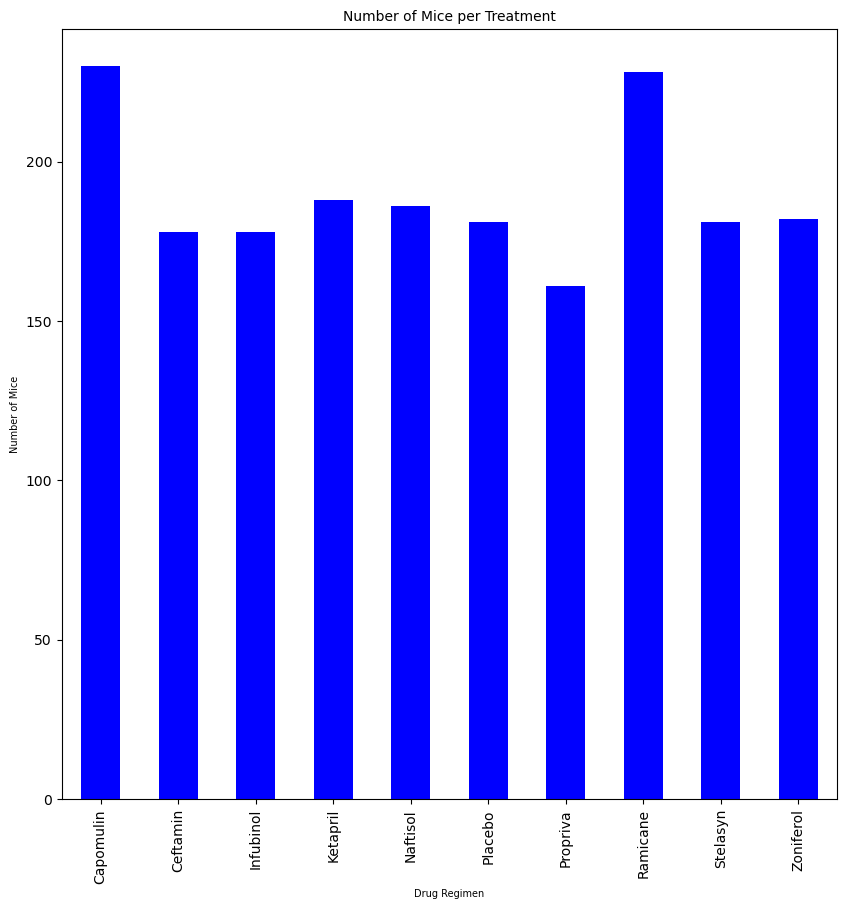

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_treat_count = combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = mice_treat_count.plot.bar(figsize=(10,10), color ='b', fontsize = 10)
mice_treat_count
plt.xlabel("Drug Regimen", fontsize = 7)
plt.ylabel("Number of Mice", fontsize= 7)
plt.title("Number of Mice per Treatment", fontsize = 10)


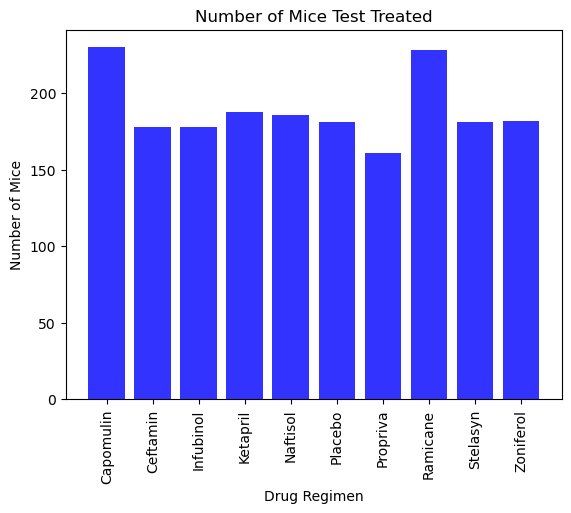

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_treat_count.index.values
y_axis = mice_treat_count.values

plt.bar(x_axis, y_axis, color ='b', alpha =0.8, align= 'center')

plt.title("Number of Mice Test Treated")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation= "vertical")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

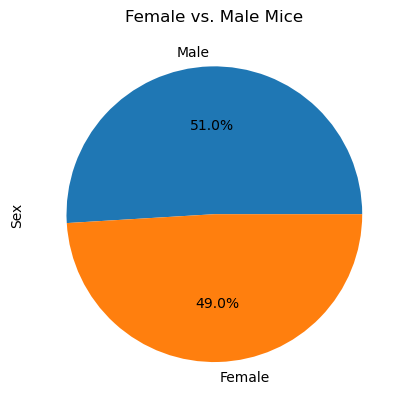

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
sex_data.plot.pie(autopct= "%1.1f%%")
plt.show

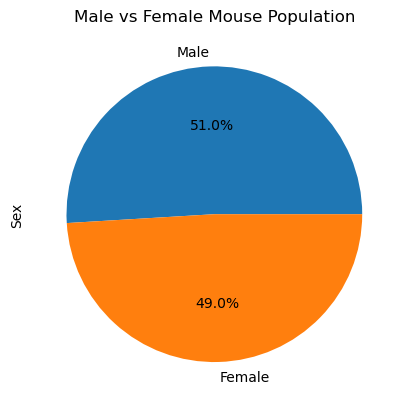

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lables = ['Female', 'Male']
sizes = [49.4, 50.6]
plot = sex_data.plot.pie(y= 'Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse
maxvol = clean_data.groupby(["Mouse ID"])
max_time= maxvol["Timepoint"].max()


#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time= clean_data.loc[clean_data.groupby("Mouse ID")["Timepoint"].idxmax(),["Mouse ID", "Timepoint","Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]

drug_choice= last_time[last_time["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_choice

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Weight (g)
463,a203,45,67.973419,Infubinol,23
473,a251,45,65.525743,Infubinol,25
493,a275,45,62.999356,Ceftamin,28
327,a411,45,38.407618,Ramicane,22
430,a444,45,43.047543,Ramicane,25
...,...,...,...,...,...
1845,y769,45,68.594745,Ceftamin,27
124,y793,45,31.896238,Capomulin,17
1855,y865,45,64.729837,Ceftamin,26
84,z578,45,30.638696,Ramicane,16


Text(0.5, 1.0, 'Final Tumor Volume by Drug Regimen')

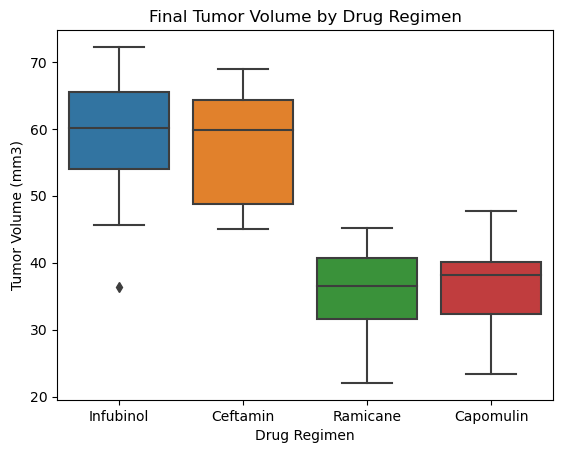

In [85]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#I went wit the method I learned during project 1
my_box_plot= sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=drug_choice)
my_box_plot.set_title("Final Tumor Volume by Drug Regimen")

## Line and Scatter Plots

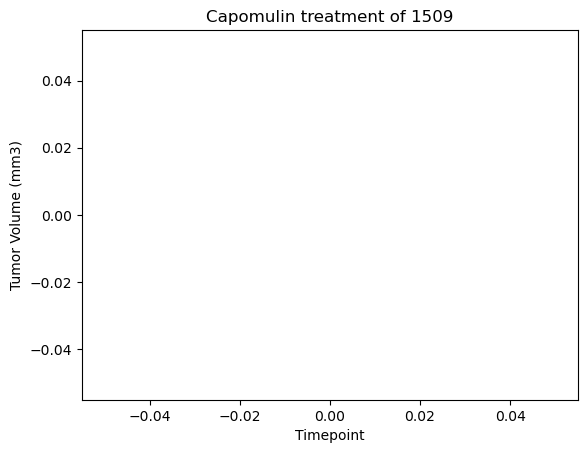

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"]== "Capomulin"].copy()
cap_mouse_df = capomulin_df["Mouse ID"].unique()

mouse_id = "1509"

mouse_of_interest= capomulin_df.loc[capomulin_df["Mouse ID"]== mouse_id].copy()
#Plot a line
plt.plot(mouse_of_interest["Timepoint"], mouse_of_interest["Tumor Volume (mm3)"], color= "green", linewidth=10)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of " + mouse_id)
plt.show()


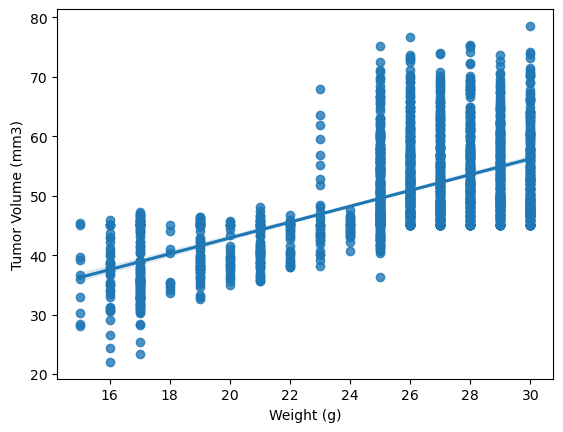

In [89]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_by_tumor= sns.regplot(x='Weight (g)', y= 'Tumor Volume (mm3)', data =combine_data)

## Correlation and Regression

In [91]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#I believe I solved in the above graph

TypeError: 'Axes' object is not subscriptable